In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
data_=pd.read_csv("\\Users\\piyus\\Documents\\ExcelR project\\WarrantyClaim.csv")
data_.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [ ]:
data_.shape

(358, 21)

In [ ]:
#checking for duplicate values
data_.duplicated(subset=None,keep='first').sum()

0

In [ ]:
#droping unwanted columns
data=data_.drop("Unnamed: 0",axis='columns')
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [ ]:
#checking for na values
print(data.isna().sum())

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64


In [ ]:
len(data[data.Fraud==1])

35

In [ ]:
len(data[data.Fraud==0])

323

### examining all the columns and there respective values

In [ ]:
# unique values in Region columns 
data.Region.unique()

array(['South', 'North', 'North East', 'North West', 'South East',
       'South West', 'West', 'East'], dtype=object)

In [ ]:
data.groupby('Region')['Region'].agg('count').sort_values(ascending=False)

Region
South         85
North East    53
South East    50
West          49
East          39
North         33
North West    27
South West    22
Name: Region, dtype: int64

In [ ]:
#unique values in state column
data.State.unique()

array(['Karnataka', 'Haryana', 'Tamil Nadu', 'Jharkhand', 'Kerala',
       'Andhra Pradesh', 'Bihar', 'Gujarat', 'Delhi', 'Maharashtra',
       'West Bengal', 'Goa', 'Jammu and Kashmir', 'Assam', 'Rajasthan',
       'Madhya Pradesh', 'Uttar Pradesh', 'Tripura', 'Himachal Pradesh',
       'Orissa'], dtype=object)

In [ ]:
state_stats=data.groupby('State')['State'].agg('count').sort_values(ascending=False)
state_stats

State
Andhra Pradesh       59
Tamil Nadu           46
Maharashtra          39
Karnataka            30
Gujarat              29
Kerala               28
Uttar Pradesh        24
Delhi                22
Bihar                19
West Bengal          19
Orissa               17
Goa                   5
Jharkhand             4
Madhya Pradesh        4
Rajasthan             4
Himachal Pradesh      2
Jammu and Kashmir     2
Assam                 2
Tripura               2
Haryana               1
Name: State, dtype: int64

In [ ]:
#here are few states form where less than or equal to 10 clamints belongs
less_10=state_stats[state_stats<=10]
less_10

State
Goa                  5
Jharkhand            4
Madhya Pradesh       4
Rajasthan            4
Himachal Pradesh     2
Jammu and Kashmir    2
Assam                2
Tripura              2
Haryana              1
Name: State, dtype: int64

## Dimensonality Reduction

#### Any state having less than 10 data points tagged as "Other_state" location. This way number of categories can be reduced it will help us with having fewer dummy columns

In [ ]:

data['State']=data['State'].apply(lambda x: 'Other_state' if x in less_10 else x)
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Other_state,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Other_state,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [ ]:
#unique citys names in "city" column
data['City'].unique()

array(['Bangalore', 'Chandigarh', 'Chennai', 'Ranchi', 'Kochi',
       'Hyderabad', 'Patna', 'Purnea', 'Vadodara', 'New Delhi', 'Mumbai',
       'Ahmedabad', 'Pune', 'Kolkata', 'Vizag', 'Panaji', 'Srinagar',
       'Guwhati', 'Jaipur', 'Bhopal', 'Meerut', 'Delhi', 'Agartala',
       'Shimla', 'Bhubaneswar', 'Vijayawada', 'Lucknow'], dtype=object)

In [ ]:
city_stats=data.groupby('City')['City'].agg('count').sort_values(ascending=False)
city_stats

City
Chennai        46
Hyderabad      37
Mumbai         32
Bangalore      30
Kochi          28
Lucknow        21
Kolkata        19
Bhubaneswar    17
Vijayawada     16
Ahmedabad      16
New Delhi      15
Vadodara       13
Patna          10
Purnea          9
Delhi           7
Pune            7
Vizag           6
Panaji          5
Jaipur          4
Ranchi          4
Bhopal          4
Meerut          3
Guwhati         2
Shimla          2
Srinagar        2
Agartala        2
Chandigarh      1
Name: City, dtype: int64

In [ ]:
#Any city having less than 10 data points tagged as "Other_City" location.

less_than_10=city_stats[city_stats<=10]
data['City']=data['City'].apply(lambda x: "Other_city" if x in less_than_10 else x)
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Other_state,Urban,Other_city,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Other_state,Rural,Other_city,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [ ]:
data['Consumer_profile'].unique()

array(['Business', 'Personal'], dtype=object)

In [ ]:
data['Product_category'].unique()

array(['Entertainment', 'Household'], dtype=object)

In [ ]:
data['Product_type'].unique()

array(['TV', 'AC'], dtype=object)

### Outlier_detection

In [ ]:
data['Claim_Value'].unique()

array([15000. , 20000. , 18000. , 12000. , 25000. , 10000. , 50000. ,
       21000. , 13000. , 40000. ,  5557. ,   373. ,  2742. ,  5901. ,
        4585. ,  8386. ,  6610. ,  3905. ,  7760. ,  7028. ,  5284. ,
        1571. ,  4000. ,  4805. ,  3501. ,  7755. ,  6956. ,  6542. ,
         170. ,  6993. ,  4948. ,  3549. ,  7725. ,  4862. ,  1656. ,
        2856. ,  4097. ,  5191. ,  7778. ,  5316. ,  4905. ,   970. ,
        4474. ,  4891. ,  4024. ,  3316. ,  4216. ,   821. ,  4504. ,
        7153. ,  3401. ,  5770. ,  3539. ,  3949. ,  6586. ,  6022. ,
        5764. ,  2250. ,  5652. ,  5918. ,  3541. ,  6449. ,  4388. ,
        5716.5,  3129. ,  5418. ,  7369. ,  5584. ,  1029. ,  7000. ,
        2961. ,  5987. ,  4163. ,  7528. ,  7370. ,  8344. ,  2538. ,
        5465. ,  3149. ,  4431. ,  3998. ,  3589. ,  1388. ,  1003. ,
        1691. ,  4674. ,  3651. ,  3580. ,  6405. ,  5618. ,  6732. ,
        6767. ,   501. ,  5821. ,  7235. ,  4088. ,  4396. ,  5283. ,
        5033. ,  483

In [ ]:
data['Claim_Value'].describe()

count      358.000000
mean     11994.534916
std      12063.213579
min          0.000000
25%       4006.000000
50%       7194.000000
75%      15000.000000
max      50000.000000
Name: Claim_Value, dtype: float64

(array([192.,  90.,  52.,   0.,  24.]),
 array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <BarContainer object of 5 artists>)

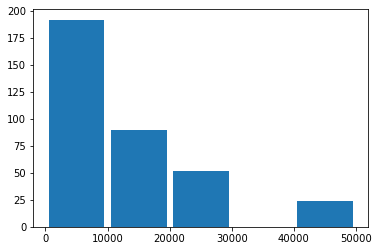

In [ ]:
plt.hist(data.Claim_Value,bins=5,rwidth=0.9)

{'whiskers': [<matplotlib.lines.Line2D at 0x26399000670>,
 'caps': [<matplotlib.lines.Line2D at 0x26399000d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x26399000310>],
 'medians': [<matplotlib.lines.Line2D at 0x2639900f430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2639900f790>],
 'means': []}

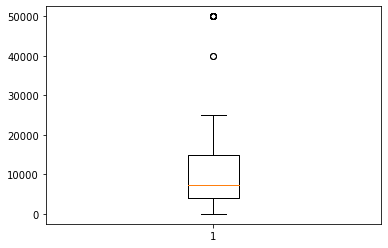

In [ ]:
plt.boxplot(data.Claim_Value)

****From above boxplot we can examine that there are few Outler and Boxplot shown that Outliers are at upper Quartile****       
****In Claim_value column there is claim_value 0 & even lesser than 500 rupess and person climed Warranty it's an data error ,considering all that value as Outlier

In [ ]:
data['Claim_Value'].quantile(0.25)

4006.0

In [ ]:
data['Claim_Value'].quantile(0.85)

20000.0

###### Here are the Rows having  ""Claim_Value""  lesser than 20 percentile

In [ ]:
data[data['Claim_Value']<data['Claim_Value'].quantile(0.20)]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
78,East,West Bengal,Urban,Kolkata,Personal,Entertainment,TV,0,0,0,1,2,1,373.0,14,72,Dealer,30.0,Claim,0
79,South,Kerala,Urban,Kochi,Business,Household,AC,0,2,1,0,0,0,2742.0,10,214,Manufacturer,30.0,Complaint,0
84,South East,Andhra Pradesh,Rural,Hyderabad,Personal,Entertainment,TV,0,0,0,0,1,0,3905.0,13,683,Dealer,19.0,Claim,0
88,North,Other_state,Rural,Other_city,Personal,Entertainment,TV,0,0,0,0,2,0,1571.0,11,55,Dealer,30.0,Claim,0
91,North East,Other_state,Urban,Other_city,Personal,Entertainment,TV,0,0,0,1,2,0,3501.0,14,43,Dealer,30.0,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,North,Bihar,Urban,Other_city,Personal,Household,AC,0,1,1,0,0,0,0.0,15,10,Internet,1.4,Complaint,0
353,East,Tamil Nadu,Rural,Chennai,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,13,3,Manufacturer,0.5,Complaint,0
354,North East,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,1,0.0,15,12,Manufacturer,1.6,Complaint,0
355,South,Tamil Nadu,Urban,Chennai,Personal,Entertainment,TV,0,0,0,2,0,0,0.0,15,254,Dealer,9.0,Claim,0


In [ ]:
data[data['Claim_Value']<data['Claim_Value'].quantile(0.20)].shape

(68, 20)

###### 68 rows  have ""Claim_Value"" less than 20 percentile

###### Here are the Rows having  ""Claim_Value""  greater than 90 percentile

In [ ]:
data[data['Claim_Value']>data['Claim_Value'].quantile(0.90)]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
8,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,1,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,0
14,South East,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,1,1,1,50000.0,12,19,Manufacturer,1.3,Claim,0
20,North East,Karnataka,Urban,Bangalore,Personal,Household,AC,0,0,0,0,0,0,50000.0,15,15,Manufacturer,0.5,Claim,0
32,South,Bihar,Urban,Other_city,Business,Entertainment,TV,0,0,0,0,1,0,40000.0,10,14,Manufacturer,1.5,Claim,1
38,South East,Maharashtra,Urban,Mumbai,Business,Household,AC,0,0,1,0,0,0,50000.0,12,6,Dealer,2.4,Claim,0
44,North East,Bihar,Urban,Other_city,Personal,Household,AC,0,0,0,0,0,0,50000.0,15,4,Manufacturer,1.3,Claim,0
50,East,Andhra Pradesh,Urban,Hyderabad,Personal,Entertainment,TV,0,0,0,0,1,2,50000.0,13,18,Manufacturer,0.5,Claim,0
56,South,Tamil Nadu,Urban,Chennai,Business,Household,AC,0,0,0,0,0,0,50000.0,10,3,Manufacturer,1.6,Claim,0
59,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,1,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,1
62,South East,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,1,1,1,50000.0,12,19,Manufacturer,1.3,Claim,1


In [ ]:
data[data['Claim_Value']>data['Claim_Value'].quantile(0.90)].shape

(24, 20)

##### 49 rows  have ""Claim_Value""  more than 80 percentile

In [ ]:
#replacing this outlier with median of 'Claim_Value' column

In [ ]:
median1=data['Claim_Value'].median()

In [ ]:
data['Claim_Value']=np.where(data['Claim_Value']>data['Claim_Value'].quantile(0.85),median1,data['Claim_Value'])
data['Claim_Value']=np.where(data['Claim_Value']<data['Claim_Value'].quantile(0.20),median1,data['Claim_Value'])

In [ ]:
data['Claim_Value'].describe()

count      358.000000
mean      8959.138268
std       4419.886733
min       4000.000000
25%       6553.000000
50%       7194.000000
75%      11500.000000
max      20000.000000
Name: Claim_Value, dtype: float64

In [ ]:
data['Product_Age'].unique()

array([ 60,  10,  20,   6,   3,   4,   5,  18,   7,  21,  16,   9,  19,
        14,  12,  15, 153,  72, 214, 370, 821, 197, 908, 683, 854, 679,
       210,  55, 363, 948,  43, 550, 117, 271, 371, 505, 942, 199, 960,
       827, 864, 625,  23, 411, 140, 872, 613, 202, 337, 721, 804, 522,
       933, 123, 444, 824, 108, 126, 556,  35, 112, 377, 487, 758, 705,
       391, 826, 309, 176,  94, 914, 833, 111, 154, 961, 547, 801, 383,
       968, 626, 698,  73, 776, 820,  27, 497,  22, 530, 576, 746, 727,
       574, 388, 219, 408, 790, 289, 873, 338, 409, 951, 125, 495, 327,
       672, 609, 883, 284, 481, 991, 748, 333, 353, 187,  52, 118, 173,
       304, 167,  49, 293, 332, 331, 329, 315, 281,  57,  61, 349, 244,
       343,  80, 323, 147, 345,  68, 218, 152, 280, 213, 254,  39,  36,
       233, 247,  30, 350, 205, 311, 324, 282, 347, 274, 193,  32, 365,
       170, 303, 330,  79,  26,  45, 287, 224, 275, 301, 356, 103, 288,
       148, 291, 180,  81,  46, 159, 206, 300, 257, 131, 340, 27

{'whiskers': [<matplotlib.lines.Line2D at 0x2639907f310>,
 'caps': [<matplotlib.lines.Line2D at 0x2639907f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26399071f70>],
 'medians': [<matplotlib.lines.Line2D at 0x2639908b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2639908b430>],
 'means': []}

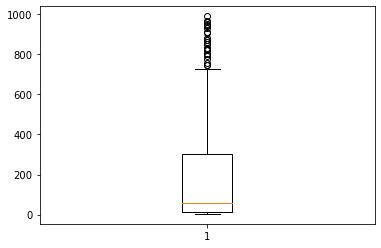

In [ ]:
plt.boxplot(data['Product_Age'])

In [ ]:
staats=data['Product_Age'].mean()+1*data['Product_Age'].std()
staats

461.5751392820188

In [ ]:
data[data['Product_Age']>staats]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
81,West,Maharashtra,Rural,Mumbai,Business,Entertainment,TV,0,0,0,0,2,1,4585.0,12,821,Manufacturer,17.0,Complaint,0
83,South West,Other_state,Rural,Other_city,Business,Entertainment,TV,0,0,0,0,2,1,6610.0,14,908,Dealer,30.0,Complaint,0
84,South East,Andhra Pradesh,Rural,Hyderabad,Personal,Entertainment,TV,0,0,0,0,1,0,7194.0,13,683,Dealer,19.0,Claim,0
85,South East,Andhra Pradesh,Rural,Hyderabad,Personal,Household,AC,1,1,2,0,0,0,7760.0,13,854,Manufacturer,30.0,Complaint,0
86,East,West Bengal,Urban,Kolkata,Personal,Entertainment,TV,0,0,0,1,2,0,7028.0,14,679,Manufacturer,30.0,Claim,1
90,South East,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,0,4805.0,12,948,Dealer,3.0,Claim,0
92,West,Gujarat,Urban,Ahmedabad,Personal,Household,AC,1,1,2,0,0,0,7755.0,13,550,Dealer,30.0,Claim,0
96,West,Gujarat,Urban,Ahmedabad,Personal,Household,AC,1,1,2,0,0,0,6993.0,15,505,Manufacturer,7.0,Complaint,1
97,South East,Andhra Pradesh,Rural,Other_city,Personal,Household,AC,0,1,0,0,0,0,4948.0,13,942,Manufacturer,30.0,Claim,0
99,North West,Other_state,Rural,Other_city,Personal,Entertainment,TV,0,0,0,1,1,1,7725.0,11,960,Manufacturer,30.0,Other,0


In [ ]:
data[data['Product_Age']>staats].shape

(52, 20)

In [ ]:
median2=data['Product_Age'].median()

In [ ]:
data['Product_Age']=np.where(data['Product_Age']>staats,median2,data['Product_Age'])

In [ ]:
data['Call_details'].unique()

array([ 0.5,  1. ,  1.4,  2. ,  1.3,  1.6,  2.6,  2.4,  6.5,  1.5,  2.5,
       30. , 17. , 19. ,  3. ,  6. ,  4. ,  7. ,  8. , 13. , 14. , 20. ,
        9. , 27. , 24. , 28. , 25. ,  5. , 12. , 10. , 23. , 22. , 15. ,
       21. , 16. , 11. , 18. ])

{'whiskers': [<matplotlib.lines.Line2D at 0x263990e3310>,
 'caps': [<matplotlib.lines.Line2D at 0x263990e39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x263990daf70>],
 'medians': [<matplotlib.lines.Line2D at 0x263990f20d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x263990f2430>],
 'means': []}

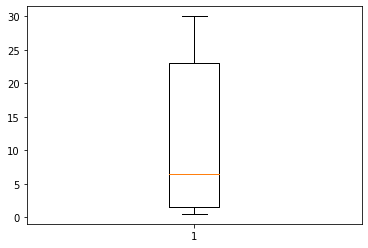

In [ ]:
plt.boxplot(data.Call_details)

In [ ]:
dummies=pd.get_dummies(data[['Region','State','Area','City','Consumer_profile','Product_category','Product_type','Purchased_from','Purpose']])


In [ ]:
dummies.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Bihar,...,Product_category_Entertainment,Product_category_Household,Product_type_AC,Product_type_TV,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
dummies.columns

Index(['Region_East', 'Region_North', 'Region_North East', 'Region_North West',
       'Region_South', 'Region_South East', 'Region_South West', 'Region_West',
       'State_Andhra Pradesh', 'State_Bihar', 'State_Delhi', 'State_Gujarat',
       'State_Karnataka', 'State_Kerala', 'State_Maharashtra', 'State_Orissa',
       'State_Other_state', 'State_Tamil Nadu', 'State_Uttar Pradesh',
       'State_West Bengal', 'Area_Rural', 'Area_Urban', 'City_Ahmedabad',
       'City_Bangalore', 'City_Bhubaneswar', 'City_Chennai', 'City_Hyderabad',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai',
       'City_New Delhi', 'City_Other_city', 'City_Vadodara', 'City_Vijayawada',
       'Consumer_profile_Business', 'Consumer_profile_Personal',
       'Product_category_Entertainment', 'Product_category_Household',
       'Product_type_AC', 'Product_type_TV', 'Purchased_from_Dealer',
       'Purchased_from_Internet', 'Purchased_from_Manufacturer',
       'Purpose_Claim', 'Purpose_Complai

In [ ]:
data1=pd.concat([data,dummies],axis='columns')
data1.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,...,Product_category_Entertainment,Product_category_Household,Product_type_AC,Product_type_TV,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,...,0,1,1,0,1,0,0,0,1,0
2,North,Other_state,Urban,Other_city,Personal,Household,AC,0,1,2,...,0,1,1,0,1,0,0,1,0,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,North East,Other_state,Rural,Other_city,Personal,Entertainment,TV,0,0,0,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
data2=data1.drop(['Region','State','Area','City','Consumer_profile','Product_category','Product_type','Purchased_from','Purpose'],axis='columns')
data2.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,...,Product_category_Entertainment,Product_category_Household,Product_type_AC,Product_type_TV,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
0,0,0,0,1,2,0,15000.0,10,60.0,0.5,...,1,0,0,1,0,0,1,0,1,0
1,1,1,0,0,0,0,20000.0,12,10.0,1.0,...,0,1,1,0,1,0,0,0,1,0
2,0,1,2,0,0,0,18000.0,14,10.0,1.4,...,0,1,1,0,1,0,0,1,0,0
3,0,0,0,1,1,0,12000.0,16,20.0,2.0,...,1,0,0,1,0,0,1,0,1,0
4,0,0,0,0,1,2,7194.0,15,6.0,1.3,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
data2.columns

Index(['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value', 'Service_Centre',
       'Product_Age', 'Call_details', 'Fraud', 'Region_East', 'Region_North',
       'Region_North East', 'Region_North West', 'Region_South',
       'Region_South East', 'Region_South West', 'Region_West',
       'State_Andhra Pradesh', 'State_Bihar', 'State_Delhi', 'State_Gujarat',
       'State_Karnataka', 'State_Kerala', 'State_Maharashtra', 'State_Orissa',
       'State_Other_state', 'State_Tamil Nadu', 'State_Uttar Pradesh',
       'State_West Bengal', 'Area_Rural', 'Area_Urban', 'City_Ahmedabad',
       'City_Bangalore', 'City_Bhubaneswar', 'City_Chennai', 'City_Hyderabad',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai',
       'City_New Delhi', 'City_Other_city', 'City_Vadodara', 'City_Vijayawada',
       'Consumer_profile_Business', 'Consumer_profile_Personal',
       'Product_category_Entertainment', 'Product_

##### Droping One column on which we applied dummie variable to overcome dummie variable trap

In [ ]:
data3=data2.drop(['State_Other_state','Region_East','City_Other_city','Purpose_Other','Purchased_from_Dealer','Consumer_profile_Personal','Product_category_Entertainment'],axis='columns')

In [ ]:
data3.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,...,City_Vadodara,City_Vijayawada,Consumer_profile_Business,Product_category_Household,Product_type_AC,Product_type_TV,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint
0,0,0,0,1,2,0,15000.0,10,60.0,0.5,...,0,0,1,0,0,1,0,1,0,1
1,1,1,0,0,0,0,20000.0,12,10.0,1.0,...,0,0,1,1,1,0,0,0,0,1
2,0,1,2,0,0,0,18000.0,14,10.0,1.4,...,0,0,0,1,1,0,0,0,1,0
3,0,0,0,1,1,0,12000.0,16,20.0,2.0,...,0,0,1,0,0,1,0,1,0,1
4,0,0,0,0,1,2,7194.0,15,6.0,1.3,...,0,0,0,0,0,1,0,0,1,0


### spliting imbalance data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data3.drop('Fraud',axis=1),data3.Fraud,test_size=0.25,random_state=42)

## GridSearchCv to find best model as well as to find best parameter of respective model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def get_best_(X_train,X_test,y_train,y_test):
    moddel= {
        'Logistic_Regression' : {
            'model' : LogisticRegression(max_iter=10000),
            'params' : {
                'solver' : ['lbfgs', 'liblinear']
        }
    },
        'DecisionTreeClassifier' : {
            'model' : DecisionTreeClassifier(),
            'params' : {
                'criterion' : ['gini', 'entropy']
            } 
        },
        'GaussianNB' : {
            'model' : GaussianNB(),
            'params' : {
                'var_smoothing':[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]
            }
        },
        'RandomForestClassifier' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'criterion' : ['gini','entropy']
            }
          },
          'SVM' : {
            'model' : SVC(C=1),
            'params' : {
                'gamma' : ['auto','scale']
        }
    }
}
    scores = []
    for moddel_name, config in moddel.items():
        gs =  GridSearchCV(config['model'], config['params'])
        gs.fit(X_train,y_train)
        gs.predict(X_test)
        scores.append({
            'model': moddel_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'test_score' : gs.score(X_test,y_test)
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params','test_score'])
    
        


### ANN

In [ ]:
def neural_network(X_train,X_test,y_train,y_test):
    model=keras.Sequential([
        keras.layers.Dense(50,input_shape=(50,),activation='relu'),
        keras.layers.Dense(25,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    model.fit(X_train,y_train,epochs=100)
    
          
    y_pred=model.predict(X_test)
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    test_score=model.evaluate(X_test,y_test)
     
    print(test_score)
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds


## function to check classification model

In [ ]:
from sklearn.pipeline import Pipeline

def class_report(X_train,X_test,y_train,y_test):
    pipelines = []
    pipelines.append(('Logistic', Pipeline([('Logistic' , LogisticRegression(solver= 'lbfgs',max_iter=10000))])))
    pipelines.append(('Tree' , Pipeline([('Tree' ,DecisionTreeClassifier(criterion='gini'))])))
    pipelines.append(('nive_bays',Pipeline([('nive_bays',GaussianNB(var_smoothing= 0.01))])))
    pipelines.append(('Forest',Pipeline([('Forest',RandomForestClassifier(criterion='gini'))])))
    pipelines.append(('SVM', Pipeline([('SVM',SVC(C= 1))])))
    
    
    for name, model in pipelines:
        result = cross_val_score(model, X_train, y_train)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        msg = "%s: %f (%f)" % (name, result.mean(), result.std())
        print(msg)
        

## Checking how different models works on Imbalance data

In [ ]:
get_best_(X_train,X_test,y_train,y_test)

,model,best_score,best_params,test_score
0,Logistic_Regression,0.884347,{'solver': 'lbfgs'},0.922222
1,DecisionTreeClassifier,0.809434,{'criterion': 'gini'},0.800000
2,GaussianNB,0.869182,{'var_smoothing': 0.01},0.844444
3,RandomForestClassifier,0.861985,{'criterion': 'gini'},0.877778
4,SVM,0.891824,{'gamma': 'auto'},0.933333


In [ ]:
class_report(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        84
           1       0.00      0.00      0.00         6

    accuracy                           0.92        90
   macro avg       0.47      0.49      0.48        90
weighted avg       0.87      0.92      0.90        90

Logistic: 0.884347 (0.027218)
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        84
           1       0.12      0.33      0.17         6

    accuracy                           0.79        90
   macro avg       0.53      0.58      0.53        90
weighted avg       0.89      0.79      0.83        90

Tree: 0.809504 (0.033131)
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        84
           1       0.17      0.33      0.22         6

    accuracy                           0.84        90
   macro avg       0.56      0.61      0.57        90
weighted avg      

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
imbalance=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
9/9 [==============================] - 0s 4ms/step - loss: 161.3627 - accuracy: 0.8918
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 41.0074 - accuracy: 0.8321
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 26.8455 - accuracy: 0.5970
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 40.8284 - accuracy: 0.8918
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 21.2293 - accuracy: 0.8806
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 12.1385 - accuracy: 0.6530
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 10.8108 - accuracy: 0.8657
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 7.0786 - accuracy: 0.6754 
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 5.1234 - accuracy: 0.7276
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 3.7530 - accuracy: 0.7276
Epoch 11/100
9/9 [==

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Balancing the data

### Under_Sampling

In [ ]:
data_0=data3[data3['Fraud']==0]
data_1=data3[data3['Fraud']==1]

In [ ]:
data_0.Fraud.value_counts(),data_1.Fraud.value_counts()

(0    323
 Name: Fraud, dtype: int64,
 1    35
 Name: Fraud, dtype: int64)

##### under_sampling majority class i.e data_0

In [ ]:
data_0_under=data_0.sample(35)

In [ ]:
data_under=pd.concat([data_0_under,data_1],axis=0)


In [ ]:
print('Random under-sampling:')
print(data_under.Fraud.value_counts())

Random under-sampling:
0    35
1    35
Name: Fraud, dtype: int64


In [ ]:
#splitting independent and dependent variables
X=data_under.drop('Fraud',axis=1)
Y=data_under.Fraud

In [ ]:
# spliting x and y into yraining and testing set
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X,Y,test_size=0.25,random_state=10, stratify=Y)

In [ ]:
y_train_1.value_counts()

0    26
1    26
Name: Fraud, dtype: int64

In [ ]:
y_test_1.value_counts()

0    9
1    9
Name: Fraud, dtype: int64

In [ ]:
get_best_(X_train_1,X_test_1,y_train_1,y_test_1)

,model,best_score,best_params,test_score
0,Logistic_Regression,0.640000,{'solver': 'liblinear'},0.555556
1,DecisionTreeClassifier,0.596364,{'criterion': 'entropy'},0.833333
2,GaussianNB,0.632727,{'var_smoothing': 0.001},0.666667
3,RandomForestClassifier,0.578182,{'criterion': 'gini'},0.722222
4,SVM,0.612727,{'gamma': 'scale'},0.722222


In [ ]:
class_report(X_train_1,X_test_1,y_train_1,y_test_1)

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.54      0.78      0.64         9

    accuracy                           0.56        18
   macro avg       0.57      0.56      0.53        18
weighted avg       0.57      0.56      0.53        18

Logistic: 0.620000 (0.205575)
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.62      0.89      0.73         9

    accuracy                           0.67        18
   macro avg       0.71      0.67      0.65        18
weighted avg       0.71      0.67      0.65        18

Tree: 0.558182 (0.037965)
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.75      0.67      0.71         9

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg      

In [ ]:
under_sampeling=neural_network(X_train_1,X_test_1,y_train_1,y_test_1)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 27.5503 - accuracy: 0.5769
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 60.9952 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 27.0698 - accuracy: 0.5192
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 49.2736 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 14.7731 - accuracy: 0.5385
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 47.8910 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 45.1721 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9688 - accuracy: 0.4615
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 25.0051 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3694 - accuracy: 0.5000
Epoch 11/100
2/2 [========

### Over_Sampling 

In [ ]:
data_0_=data3[data3['Fraud']==0]
data_1_=data3[data3['Fraud']==1]

In [ ]:
data_0_.Fraud.value_counts(),data_1_.Fraud.value_counts()

(0    323
 Name: Fraud, dtype: int64,
 1    35
 Name: Fraud, dtype: int64)

##### Oversampling minority class i.e data_1_

In [ ]:
data_1_over=data_1_.sample(323,replace=True,random_state=3)

In [ ]:
data_test_over=pd.concat([data_1_over,data_0_],axis=0)


In [ ]:
data_test_over.Fraud.value_counts()

0    323
1    323
Name: Fraud, dtype: int64

In [ ]:
# spliting over sampled data in training and testing set

X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(data_test_over.drop('Fraud',axis=1),data_test_over.Fraud,test_size=0.25,random_state=10)

In [ ]:
get_best_(X_train_2,X_test_2,y_train_2,y_test_2)

,model,best_score,best_params,test_score
0,Logistic_Regression,0.791345,{'solver': 'liblinear'},0.796296
1,DecisionTreeClassifier,0.919394,{'criterion': 'entropy'},0.907407
2,GaussianNB,0.706680,{'var_smoothing': 1e-08},0.679012
3,RandomForestClassifier,0.954532,{'criterion': 'entropy'},0.944444
4,SVM,0.909042,{'gamma': 'auto'},0.907407


In [ ]:
class_report(X_train_2,X_test_2,y_train_2,y_test_2)

              precision    recall  f1-score   support

           0       0.72      0.71      0.72        77
           1       0.74      0.75      0.75        85

    accuracy                           0.73       162
   macro avg       0.73      0.73      0.73       162
weighted avg       0.73      0.73      0.73       162

Logistic: 0.762393 (0.040730)
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        77
           1       0.83      1.00      0.91        85

    accuracy                           0.90       162
   macro avg       0.92      0.89      0.89       162
weighted avg       0.91      0.90      0.89       162

Tree: 0.913209 (0.010634)
              precision    recall  f1-score   support

           0       0.57      0.78      0.66        77
           1       0.70      0.46      0.55        85

    accuracy                           0.61       162
   macro avg       0.63      0.62      0.60       162
weighted avg      

In [ ]:
over_sample=neural_network(X_train_2,X_test_2,y_train_2,y_test_2)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 87.7138 - accuracy: 0.5165
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 32.4519 - accuracy: 0.4318
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 11.9501 - accuracy: 0.4029
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 8.4505 - accuracy: 0.4256
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 5.2948 - accuracy: 0.4545
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 14.2918 - accuracy: 0.4690
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 3.4475 - accuracy: 0.5723
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 4.2862 - accuracy: 0.5434
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 4.3586 - accuracy: 0.5372
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 3.3111 - accuracy: 0.5558
Epoch

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### After Balancing data with OverSampling technique  "RandomForest" cameup with high accuracy and it was  predicting 0 class and  1 class almost equally

## SMOTE

In [ ]:
x=data3.drop('Fraud',axis=1)
y=data3.Fraud

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42)
smote_x,smote_y=smote.fit_resample(x,y)

In [ ]:
smote_y.value_counts()

0    323
1    323
Name: Fraud, dtype: int64

In [ ]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(smote_x,smote_y,test_size=0.25,random_state=10,stratify=smote_y)

In [ ]:
y_train_3.value_counts()

0    242
1    242
Name: Fraud, dtype: int64

In [ ]:
y_test_3.value_counts()

0    81
1    81
Name: Fraud, dtype: int64

In [ ]:
get_best_(X_train_3,X_test_3,y_train_3,y_test_3)

,model,best_score,best_params,test_score
0,Logistic_Regression,0.902814,{'solver': 'liblinear'},0.907407
1,DecisionTreeClassifier,0.880198,{'criterion': 'entropy'},0.864198
2,GaussianNB,0.867655,{'var_smoothing': 1e-10},0.888889
3,RandomForestClassifier,0.917290,{'criterion': 'entropy'},0.925926
4,SVM,0.805885,{'gamma': 'auto'},0.753086


In [ ]:
class_report(X_train_3,X_test_3,y_train_3,y_test_3)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        81
           1       0.91      0.88      0.89        81

    accuracy                           0.90       162
   macro avg       0.90      0.90      0.90       162
weighted avg       0.90      0.90      0.90       162

Logistic: 0.880155 (0.031035)
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        81
           1       0.84      0.88      0.86        81

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162

Tree: 0.867719 (0.025044)
              precision    recall  f1-score   support

           0       0.61      0.81      0.70        81
           1       0.72      0.48      0.58        81

    accuracy                           0.65       162
   macro avg       0.67      0.65      0.64       162
weighted avg      

In [ ]:
smote=neural_network(X_train_3,X_test_3,y_train_3,y_test_3)

Epoch 1/100
16/16 [==============================] - 0s 757us/step - loss: 377.5851 - accuracy: 0.4814
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 103.8081 - accuracy: 0.5041
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 34.0308 - accuracy: 0.4401
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 19.8666 - accuracy: 0.4897
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 15.4570 - accuracy: 0.5062
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 17.9316 - accuracy: 0.4649
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 9.1834 - accuracy: 0.5310
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 10.5457 - accuracy: 0.5289
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 10.2777 - accuracy: 0.5455
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 2.7581 - accuracy: 0.64

#### Here after using SMOTE technique  "Random Forest " came up with high accuracy 

### Ensemble

In [ ]:
data_0_en=data3[data3['Fraud']==0]
data_1_en=data3[data3['Fraud']==1]

In [ ]:
data_0_en.Fraud.value_counts(),data_1_en.Fraud.value_counts()

(0    323
 Name: Fraud, dtype: int64,
 1    35
 Name: Fraud, dtype: int64)

In [ ]:
323/35

9.228571428571428

In [ ]:
35*9

315

In [ ]:
def ensemble_batch(data_majority, data_minority, start, end):
    data_train = pd.concat([data_majority[start:end], data_minority], axis=0)

    X_train = data_train.drop('Fraud', axis='columns')
    y_train = data_train.Fraud
    return X_train, y_train    

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,0,35)

In [ ]:
X_train.shape

(70, 50)

In [ ]:
y_train.shape

(70,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)

In [ ]:
y_train.value_counts(),y_test.value_counts()

(0    26
 1    26
 Name: Fraud, dtype: int64,
 0    9
 1    9
 Name: Fraud, dtype: int64)

In [ ]:
acc_1 = neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 629.6710 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 510.4820 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 381.5681 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 266.6512 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 171.2047 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 58.8527 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 54.1475 - accuracy: 0.4423
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 108.0584 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 124.8608 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 112.7003 - accuracy: 0.5000
Epoch 11/100
2/2 [

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,35,70)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_2=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 58.5253 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 97.4499 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 89.1284 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 35.3895 - accuracy: 0.3654
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 58.5294 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 51.7212 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 19.0863 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 39.2588 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 32.2346 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 11.1224 - accuracy: 0.4808
Epoch 11/100
2/2 [========

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,70,105)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_3=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 708.6417 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 488.5965 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 286.8564 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 106.1165 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 43.0619 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 104.3390 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 133.7998 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 140.7830 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 129.4344 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 105.6970 - accuracy: 0.5000
Epoch 11/100
2/2 

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,105,140)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_4=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 1423.5066 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 1284.5697 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 1143.0145 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 998.6166 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 879.2649 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 761.2659 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 641.3265 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 523.6732 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 405.6695 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 284.1293 - accuracy: 0.5000
Epoch 11/100


C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,140,175)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_5=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 313.8981 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 223.4697 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 131.6413 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 48.6335 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 56.5919 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 85.6863 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 55.1965 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 18.8337 - accuracy: 0.3462
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 44.8983 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 54.8065 - accuracy: 0.5000
Epoch 11/100
2/2 [=====

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,175,210)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_6=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 659.5001 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 539.6037 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 415.8057 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 313.1318 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 206.0257 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 105.2352 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 24.0811 - accuracy: 0.4615
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 54.1624 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 89.2314 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 107.0471 - accuracy: 0.5000
Epoch 11/100
2/

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,210,245)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_7=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 495.4872 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 438.0255 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 382.5835 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 328.7748 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 273.1242 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 225.2497 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 181.0998 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 154.3704 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 123.1331 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 94.2157 - accuracy: 0.5000
Epoch 11/100
2/

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,245,280)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_8=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 38.1726 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 22.5625 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 25.2144 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1821 - accuracy: 0.4231
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 18.3501 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1372 - accuracy: 0.5385
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5300 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 14.7275 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 7.3774 - accuracy: 0.4038
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2828 - accuracy: 0.5000
Epoch 11/100
2/2 [=======

In [ ]:
X_train,y_train=ensemble_batch(data_0_en,data_1_en,280,315)
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
acc_9=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 112.8744 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 30.0632 - accuracy: 0.4231
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 76.1099 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 54.8138 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.5212 - accuracy: 0.4615
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 45.8702 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 45.1362 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 19.4997 - accuracy: 0.5385
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 25.5239 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 35.8805 - accuracy: 0.5000
Epoch 11/100
2/2 [=====

In [ ]:
#X_train,y_train=ensemble_batch(data_0_en,data_1_en,315,324)
#X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=10,stratify=y_train)
#acc_10=neural_network(X_train,X_test,y_train,y_test)

In [ ]:
acc_final = acc_1.copy()
for i in range(len(acc_1)):
    n_ones = acc_1[i] + acc_2[i] + acc_3[i] + acc_4[i] + acc_5[i] + acc_6[i] + acc_7[i] + acc_8[i] + acc_9[i] 
    if n_ones>1:
        acc_final[i] = 1
    else:
        acc_final[i] = 0

In [ ]:
print(classification_report(y_test, acc_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.50      1.00      0.67         9

    accuracy                           0.50        18
   macro avg       0.25      0.50      0.33        18
weighted avg       0.25      0.50      0.33        18



C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ensamble technque was not provided accuracy better than oversampeling and SMOTE

### After looking over all balancing technique , we find  OverSampling technique as best technique for this model  and Random Forest as best model

In [ ]:
Rf=RandomForestClassifier()
Rf.fit(X_train_2,y_train_2)
Rf.score(X_train_2,y_train_2)

0.9793388429752066

In [ ]:
Rf.score(X_test_2,y_test_2)

0.9444444444444444

In [ ]:
pred=Rf.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix
clf=confusion_matrix(y_test_2,pred)
clf

array([[68,  9],
       [ 0, 85]], dtype=int64)

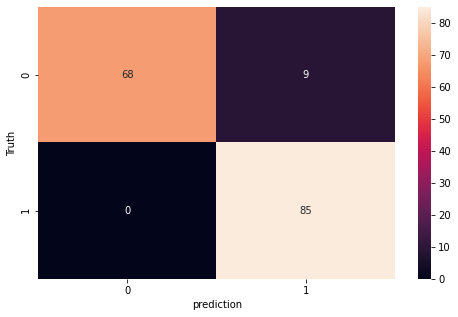

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(clf,annot=True)
plt.xlabel('prediction')
plt.ylabel('Truth')
plt.show()

In [ ]:
import pickle

In [ ]:
import pickle
pickle_out = open("warrany_claim.pkl","wb")
pickle.dump('warrany_claim.pkl',pickle_out)
pickle_out.close()